In [16]:
from utils.models import CNN
from utils.config import DEVICE, TRANSFORM
from torchvision import transforms
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import PIL
import matplotlib.pyplot as plt

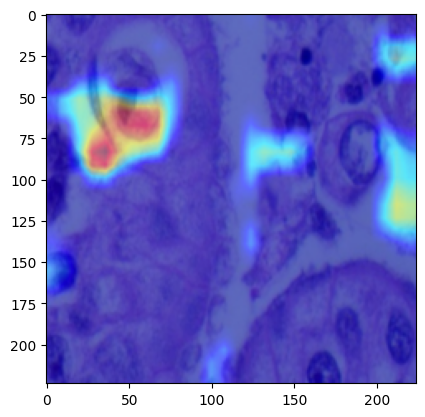

In [17]:
model = CNN(input_shape=1, output_shape=1).to(DEVICE)
model.load_state_dict(torch.load('model_weights/Best_CNN.pth'))
adeno_image = PIL.Image.open('dataset/adenocarcinoma/0000.jpg')

target_layers = [model.layer_4[3]]
input_tensor =TRANSFORM(adeno_image).to(DEVICE).unsqueeze(0).requires_grad_()

test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# transform the image to visualize should be np.float32 in the range [0, 1]
adeno_image = test_transform(adeno_image)
# reshape the image to (H, W, C)
adeno_image = adeno_image.permute(1, 2, 0).numpy()

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(0)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(adeno_image, grayscale_cam, use_rgb=True)

    plt.imshow(visualization)

    # You can also get the model outputs without having to redo inference
    model_outputs = cam.outputs

Model loaded!

Model loaded!



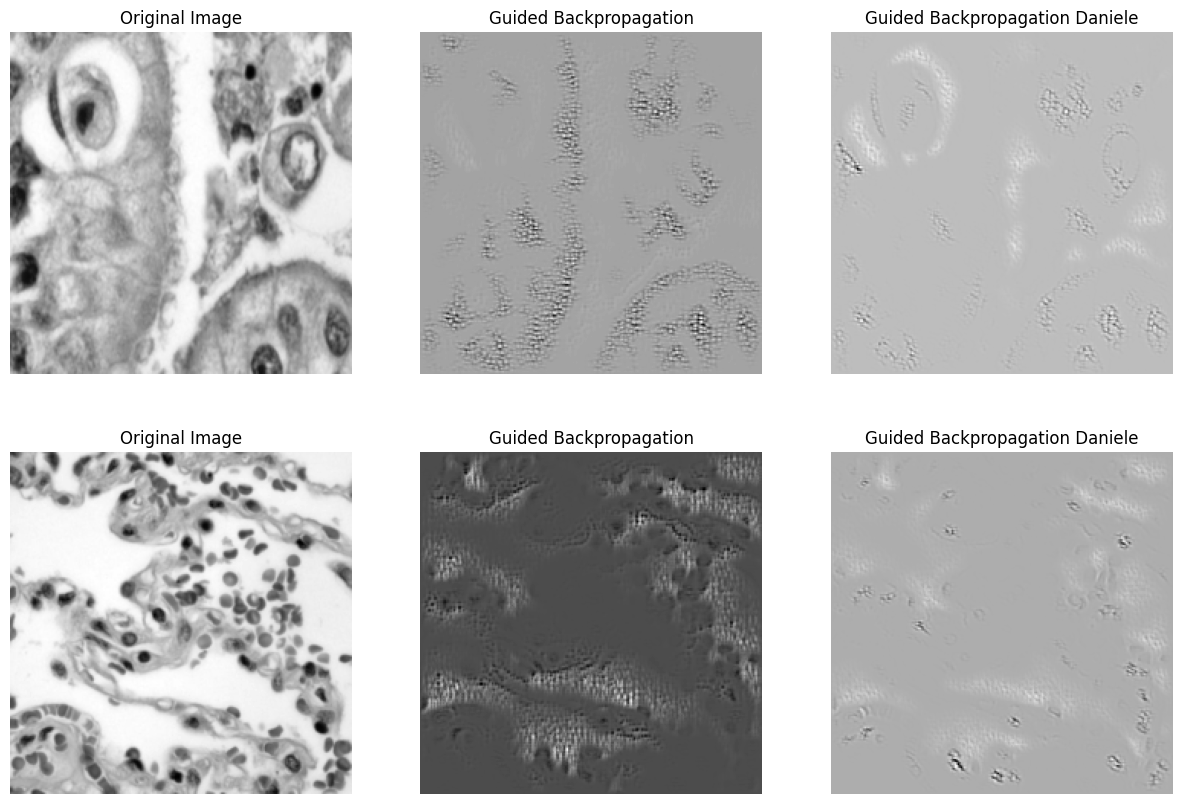

In [5]:
import captum
from matplotlib import pyplot as plt
import torch
from utils.models import CNN
from utils.config import DEVICE, TRANSFORM
from PIL import Image

def load_model(model, path):
    model.load_state_dict(torch.load(path, weights_only=False, map_location=torch.device(DEVICE)))
    print('Model loaded!\n')

model = CNN(1, 1)
model_Daniele = CNN(1, 1)
load_model(model, "model_weights/Best_CNN.pth")
load_model(model_Daniele, "model_weights/Best_CNN_Daniele.pth")

adeno_image = Image.open("dataset\\adenocarcinoma\\0000.jpg")
adeno_image = TRANSFORM(adeno_image)
adeno_image = adeno_image.unsqueeze(0).requires_grad_(True)
target_index = 0

benign_image = Image.open("dataset\\benign\\0000.jpg")
benign_image = TRANSFORM(benign_image)
benign_image = benign_image.unsqueeze(0).requires_grad_(True)

model.eval()
model_Daniele.eval()

captum_gbp = captum.attr.GuidedBackprop(model)
captum_gbp_Daniele = captum.attr.GuidedBackprop(model_Daniele)
adeno_image_gbp = captum_gbp.attribute(adeno_image, target=None)
adeno_image_gbp_Daniele = captum_gbp_Daniele.attribute(adeno_image, target=None)
benign_image_gbp = captum_gbp.attribute(benign_image, target=None)
benign_image_gbp_Daniele = captum_gbp_Daniele.attribute(benign_image, target=None)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(adeno_image.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(adeno_image_gbp.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 1].set_title('Guided Backpropagation')
ax[0, 1].axis('off')
ax[0, 2].imshow(adeno_image_gbp_Daniele.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 2].set_title('Guided Backpropagation Daniele')
ax[0, 2].axis('off')
ax[1, 0].imshow(benign_image.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(benign_image_gbp.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 1].set_title('Guided Backpropagation')
ax[1, 1].axis('off')
ax[1, 2].imshow(benign_image_gbp_Daniele.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 2].set_title('Guided Backpropagation Daniele')
ax[1, 2].axis('off')
plt.show()

Model loaded!

Model loaded!



c:\Users\marco\miniconda3\envs\CV\Lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


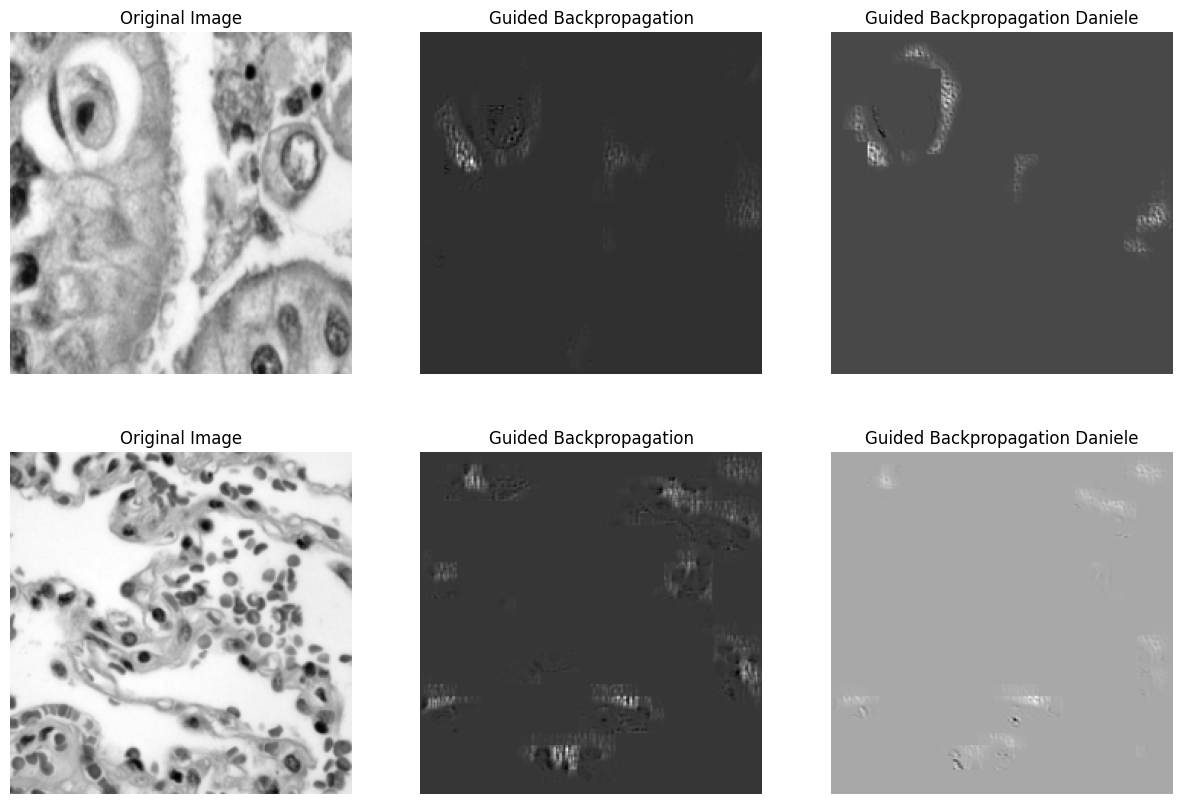

In [7]:
import captum
from matplotlib import pyplot as plt
import torch
from utils.models import CNN
from utils.config import DEVICE, TRANSFORM
from PIL import Image

def load_model(model, path):
    model.load_state_dict(torch.load(path, weights_only=False, map_location=torch.device(DEVICE)))
    print('Model loaded!\n')

model = CNN(1, 1)
model_Daniele = CNN(1, 1)
load_model(model, "model_weights/Best_CNN.pth")
load_model(model_Daniele, "model_weights/Best_CNN_Daniele.pth")

adeno_image = Image.open("dataset\\adenocarcinoma\\0000.jpg")
adeno_image = TRANSFORM(adeno_image)
adeno_image = adeno_image.unsqueeze(0).requires_grad_(True)
target_index = 0

benign_image = Image.open("dataset\\benign\\0000.jpg")
benign_image = TRANSFORM(benign_image)
benign_image = benign_image.unsqueeze(0).requires_grad_(True)

model.eval()
model_Daniele.eval()

captum_gbp = captum.attr.GuidedGradCam(model, model.layer_4[3])
captum_gbp_Daniele = captum.attr.GuidedGradCam(model_Daniele, model_Daniele.layer_4[3])
adeno_image_gbp = captum_gbp.attribute(adeno_image, target=None)
adeno_image_gbp_Daniele = captum_gbp_Daniele.attribute(adeno_image, target=None)
benign_image_gbp = captum_gbp.attribute(benign_image, target=None)
benign_image_gbp_Daniele = captum_gbp_Daniele.attribute(benign_image, target=None)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(adeno_image.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(adeno_image_gbp.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 1].set_title('Guided Backpropagation')
ax[0, 1].axis('off')
ax[0, 2].imshow(adeno_image_gbp_Daniele.squeeze().detach().cpu().numpy(), cmap='gray')
ax[0, 2].set_title('Guided Backpropagation Daniele')
ax[0, 2].axis('off')
ax[1, 0].imshow(benign_image.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(benign_image_gbp.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 1].set_title('Guided Backpropagation')
ax[1, 1].axis('off')
ax[1, 2].imshow(benign_image_gbp_Daniele.squeeze().detach().cpu().numpy(), cmap='gray')
ax[1, 2].set_title('Guided Backpropagation Daniele')
ax[1, 2].axis('off')
plt.show()

Model loaded!

torch.Size([1, 3, 224, 224])


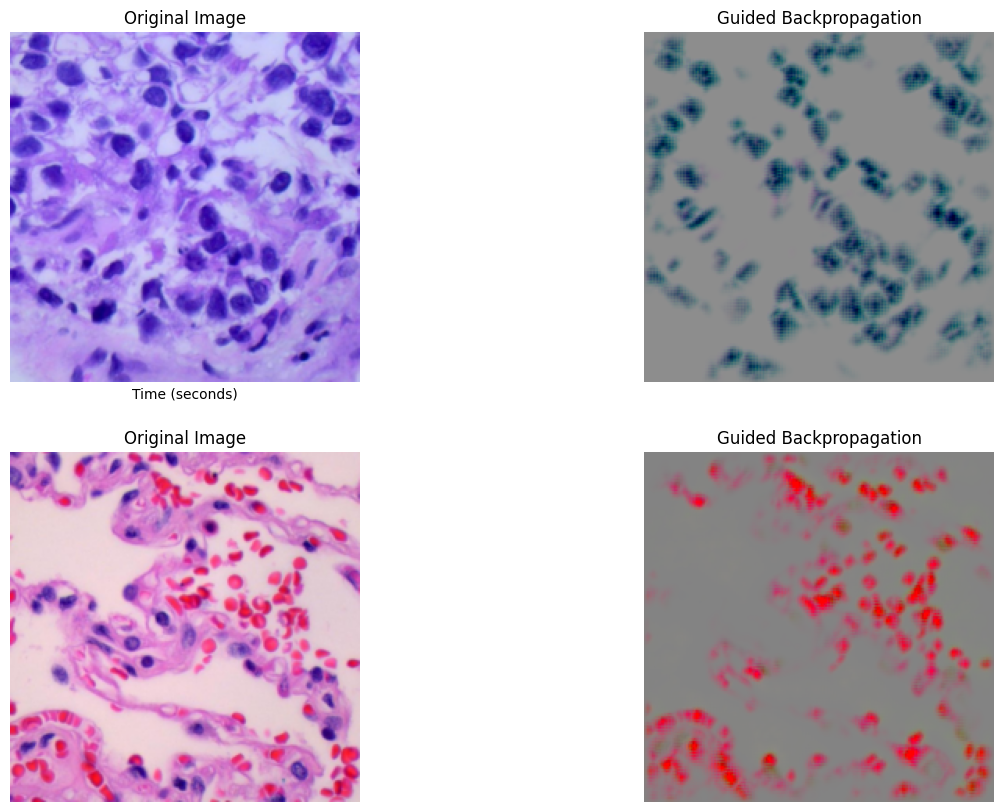

In [6]:
import captum
from matplotlib import pyplot as plt
import torch
from utils.models import CNN
from utils.config import DEVICE, TRANSFORM
from PIL import Image
import warnings
from utils.utils import normalize

def load_model(model, path):
    model.load_state_dict(torch.load(path, weights_only=False, map_location=torch.device(DEVICE)))
    print('Model loaded!\n')

model = CNN(3, 1)
load_model(model, "model_weights/Best_CNN.pth")

adeno_image = Image.open("dataset\\adenocarcinoma\\0004.jpg")
adeno_image = TRANSFORM(adeno_image)
adeno_image = adeno_image.unsqueeze(0).requires_grad_(True)
target_index = 0

benign_image = Image.open("dataset\\benign\\0000.jpg")
benign_image = TRANSFORM(benign_image)
benign_image = benign_image.unsqueeze(0).requires_grad_(True)

model.eval()

print(adeno_image.shape)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    captum_gbp = captum.attr.GuidedBackprop(model)
    adeno_image_gbp = captum_gbp.attribute(adeno_image, target=None)
    benign_image_gbp = captum_gbp.attribute(benign_image, target=None)

adeno_image_gbp = normalize(adeno_image_gbp)
benign_image_gbp = normalize(benign_image_gbp)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(adeno_image.squeeze().detach().cpu().permute(1,2,0))
ax[0, 0].set_title('Original Image')
ax[0, 0].set_xlabel('Time (seconds)')
ax[0, 1].imshow(adeno_image_gbp.squeeze().detach().cpu().permute(1,2,0))
ax[0, 1].set_title('Guided Backpropagation')
ax[0, 1].axis('off')
ax[1, 0].imshow(benign_image.squeeze().detach().cpu().permute(1,2,0))
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(benign_image_gbp.squeeze().detach().cpu().permute(1,2,0))
ax[1, 1].set_title('Guided Backpropagation')
ax[1, 1].axis('off')
plt.show()

Model loaded!

torch.Size([1, 3, 32, 32])
tensor([[[[ 1.3995e-04,  1.1552e-04,  1.2305e-04,  ...,  1.8961e-05,
           -1.3563e-05, -3.5822e-05],
          [ 3.9976e-05,  2.6764e-04,  1.0179e-04,  ..., -9.4059e-05,
            1.3186e-04, -3.8505e-05],
          [ 1.0552e-04,  9.6938e-05,  1.4923e-04,  ...,  3.8372e-05,
           -1.4239e-04, -6.5859e-05],
          ...,
          [-9.3761e-05, -6.4455e-04, -1.3881e-04,  ...,  9.4006e-05,
           -3.9357e-04,  5.8781e-05],
          [-1.4788e-04, -1.9928e-04,  3.6579e-04,  ..., -1.0069e-04,
           -1.7528e-04,  1.6925e-05],
          [-8.0798e-05,  1.2990e-04,  2.0060e-04,  ...,  4.3992e-05,
           -8.6632e-05,  5.4321e-05]],

         [[ 8.3178e-05,  1.7387e-04,  3.1028e-04,  ...,  1.0107e-04,
           -1.6680e-05,  7.9423e-05],
          [ 1.6795e-04,  3.6385e-04,  5.2682e-04,  ...,  2.3718e-04,
            4.9846e-04,  3.0580e-04],
          [ 1.3460e-04,  3.1182e-04,  4.2410e-04,  ...,  3.7113e-04,
            4.20

c:\Users\marco\miniconda3\envs\CV\Lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


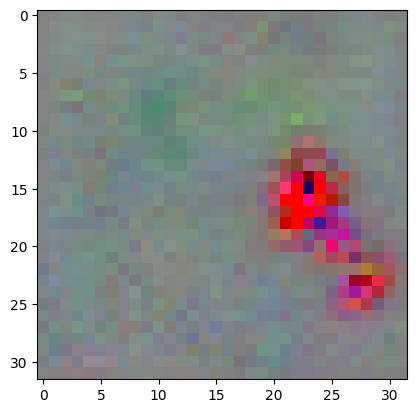

In [24]:
from utils.utils import normalize
model = CNN(3, 1)
load_model(model, "model_weights/Best_CNN.pth")
gbp = captum.attr.GuidedBackprop(model)
input = torch.randn(1, 3, 32, 32, requires_grad=True)
print(input.shape)
# Computes Guided Backprop attribution scores for class 3.
attribution = gbp.attribute(input, target=None)
print(attribution)
attribution = normalize(attribution)
plt.imshow(attribution.squeeze().cpu().permute(1,2,0))